In [1]:
# Importing essentials 

from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt 
import math

In [2]:
# Loading Data

(X_train,_) , (_,_) = mnist.load_data()


(60000, 28, 28)


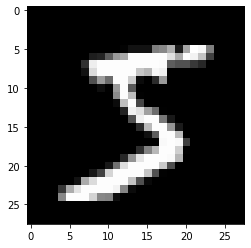

In [3]:
# VISUALISATION

print(X_train.shape)
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [4]:
# Normalise Data between [-1,1]

X_train = (X_train.astype('float32') - 127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [5]:
# Defining Essentials 

TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int((X_train.shape[0])/BATCH_SIZE)
HALF_BATCH = 128
NOISE_DIM = 100  # UPSAMPLE TO 784 DIMENSIONAL VECTOR
adam = Adam(lr = 2e-4,beta_1=0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [6]:
# Generator 

# Inputs Noise ( 100 Dimensional vector ) and Outputs ( 784 dimensional vector )

generator = Sequential()
generator.add(Dense(256 , input_shape=(NOISE_DIM , )))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer = adam)
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

In [7]:
# Downsampling 

discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784 , )))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer = adam)

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [8]:
# GAN - step2 

discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional Model
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [9]:
X_train = X_train.reshape(-1,784)
print(X_train.shape)

(60000, 784)


In [10]:
def save_imgs(epochs , samples=100):
  noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape((-1,28,28))

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')
    
  plt.tight_layout()
  plt.savefig('images/gan_generated_output{0}.png'.format(epochs+1))
  plt.show()

 Epoch No. 1 - > Discriminator Loss 0.6434 ::: Generator Loss 0.9382 
 Epoch No. 2 - > Discriminator Loss 0.6405 ::: Generator Loss 1.0208 
 Epoch No. 3 - > Discriminator Loss 0.6386 ::: Generator Loss 1.0771 
 Epoch No. 4 - > Discriminator Loss 0.6178 ::: Generator Loss 1.1380 
 Epoch No. 5 - > Discriminator Loss 0.6048 ::: Generator Loss 1.1900 


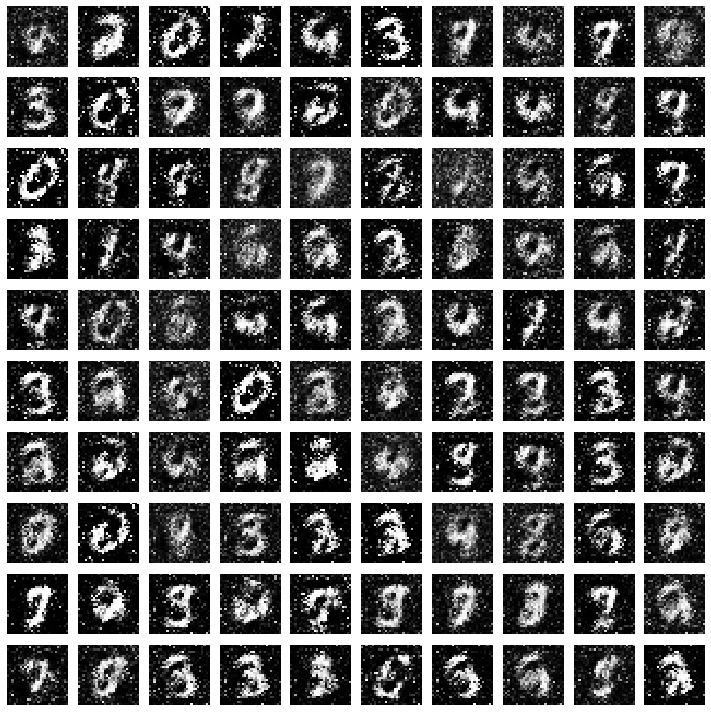

 Epoch No. 6 - > Discriminator Loss 0.5908 ::: Generator Loss 1.2185 
 Epoch No. 7 - > Discriminator Loss 0.5834 ::: Generator Loss 1.2406 
 Epoch No. 8 - > Discriminator Loss 0.5944 ::: Generator Loss 1.2144 
 Epoch No. 9 - > Discriminator Loss 0.6122 ::: Generator Loss 1.1470 
 Epoch No. 10 - > Discriminator Loss 0.6231 ::: Generator Loss 1.1082 


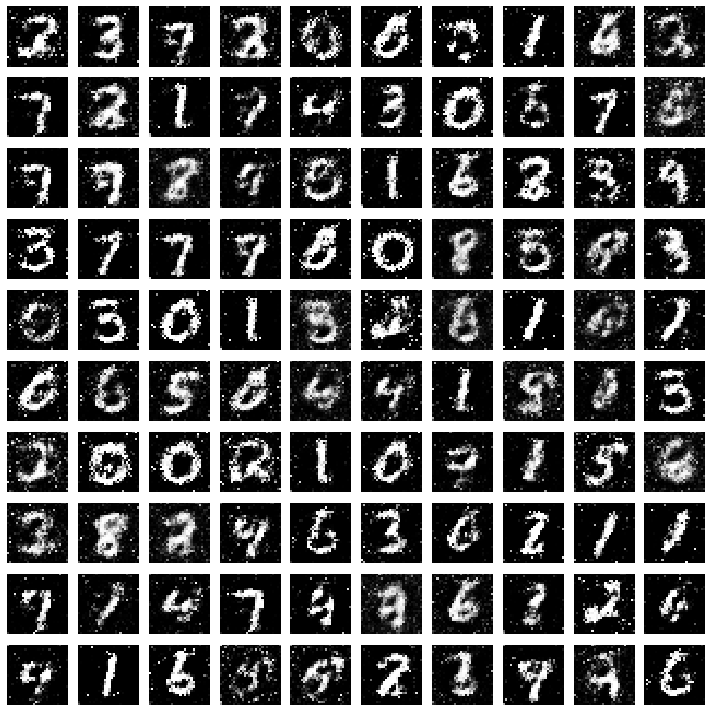

 Epoch No. 11 - > Discriminator Loss 0.6343 ::: Generator Loss 1.0658 
 Epoch No. 12 - > Discriminator Loss 0.6481 ::: Generator Loss 1.0159 
 Epoch No. 13 - > Discriminator Loss 0.6509 ::: Generator Loss 0.9999 
 Epoch No. 14 - > Discriminator Loss 0.6511 ::: Generator Loss 1.0016 
 Epoch No. 15 - > Discriminator Loss 0.6539 ::: Generator Loss 0.9869 


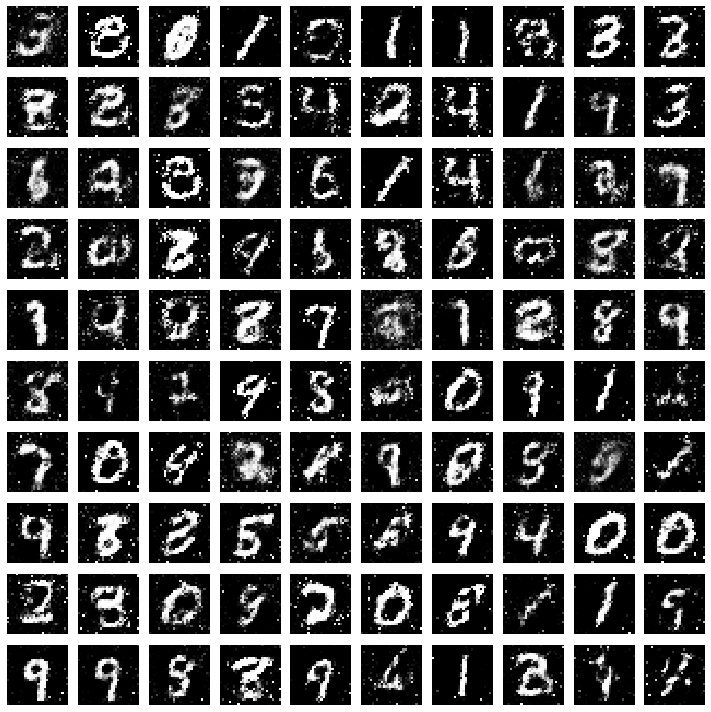

 Epoch No. 16 - > Discriminator Loss 0.6530 ::: Generator Loss 0.9815 
 Epoch No. 17 - > Discriminator Loss 0.6554 ::: Generator Loss 0.9837 
 Epoch No. 18 - > Discriminator Loss 0.6570 ::: Generator Loss 0.9820 
 Epoch No. 19 - > Discriminator Loss 0.6565 ::: Generator Loss 0.9811 
 Epoch No. 20 - > Discriminator Loss 0.6585 ::: Generator Loss 0.9770 


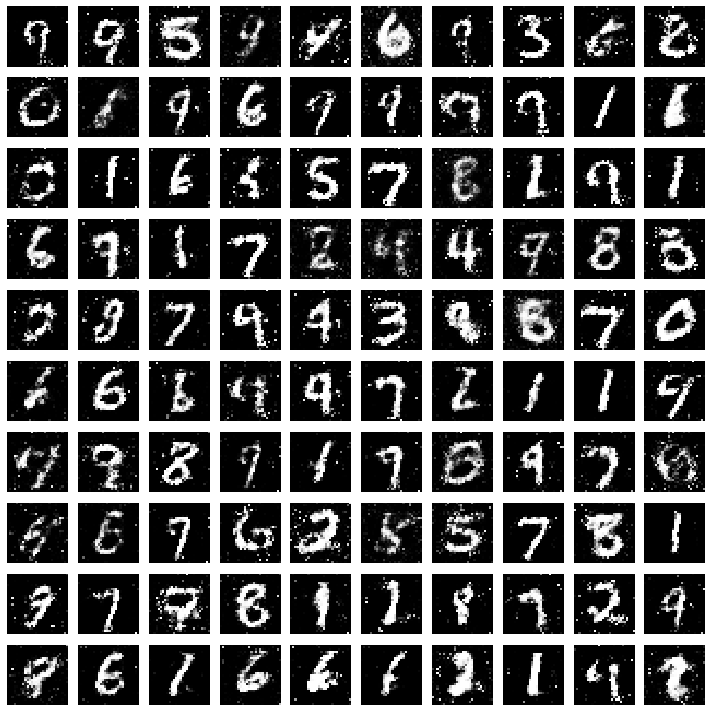

 Epoch No. 21 - > Discriminator Loss 0.6574 ::: Generator Loss 0.9833 
 Epoch No. 22 - > Discriminator Loss 0.6588 ::: Generator Loss 0.9804 
 Epoch No. 23 - > Discriminator Loss 0.6596 ::: Generator Loss 0.9733 
 Epoch No. 24 - > Discriminator Loss 0.6604 ::: Generator Loss 0.9817 
 Epoch No. 25 - > Discriminator Loss 0.6614 ::: Generator Loss 0.9706 


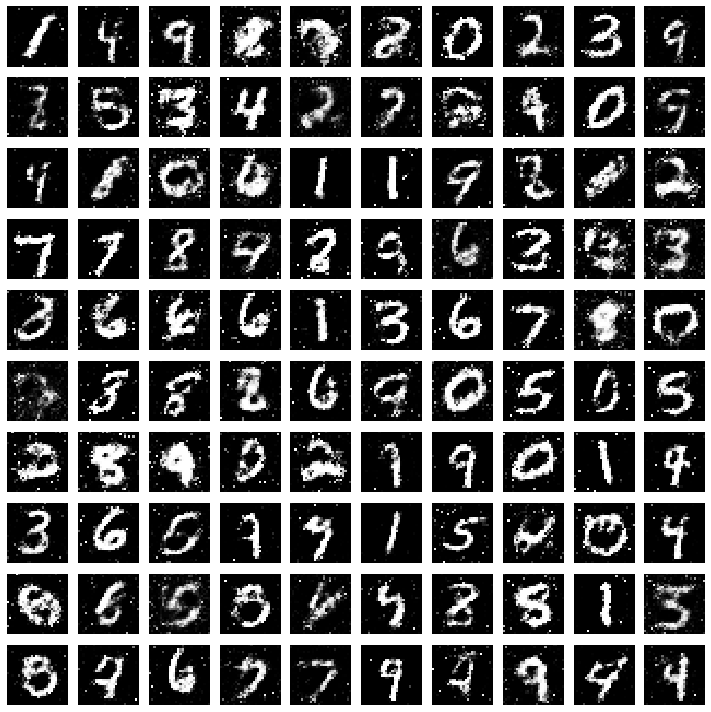

 Epoch No. 26 - > Discriminator Loss 0.6633 ::: Generator Loss 0.9667 
 Epoch No. 27 - > Discriminator Loss 0.6637 ::: Generator Loss 0.9694 
 Epoch No. 28 - > Discriminator Loss 0.6637 ::: Generator Loss 0.9644 
 Epoch No. 29 - > Discriminator Loss 0.6630 ::: Generator Loss 0.9708 
 Epoch No. 30 - > Discriminator Loss 0.6637 ::: Generator Loss 0.9712 


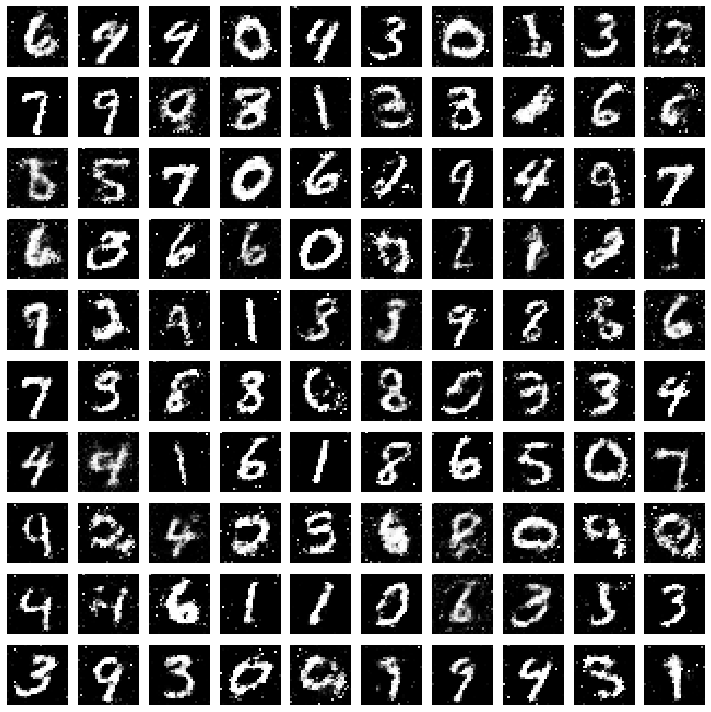

 Epoch No. 31 - > Discriminator Loss 0.6637 ::: Generator Loss 0.9747 
 Epoch No. 32 - > Discriminator Loss 0.6638 ::: Generator Loss 0.9660 
 Epoch No. 33 - > Discriminator Loss 0.6644 ::: Generator Loss 0.9692 
 Epoch No. 34 - > Discriminator Loss 0.6657 ::: Generator Loss 0.9675 
 Epoch No. 35 - > Discriminator Loss 0.6657 ::: Generator Loss 0.9645 


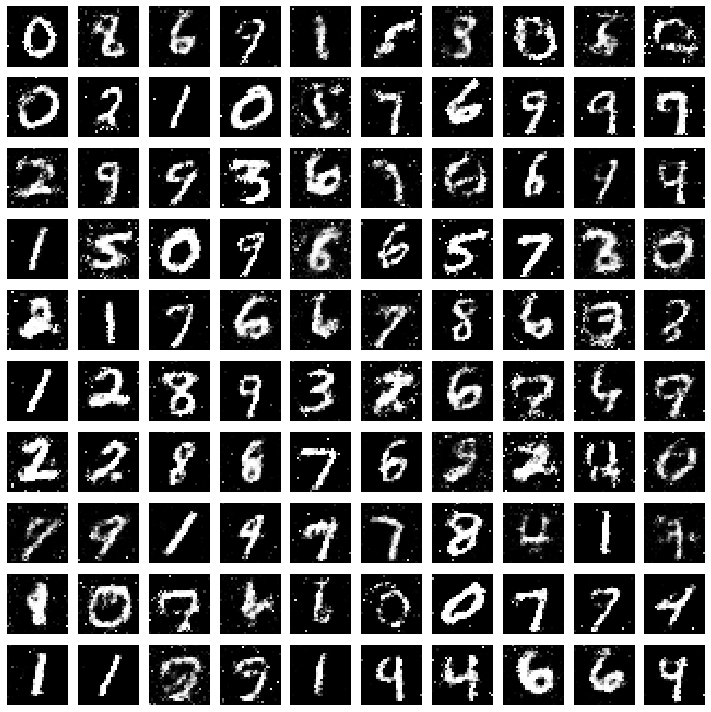

 Epoch No. 36 - > Discriminator Loss 0.6663 ::: Generator Loss 0.9635 
 Epoch No. 37 - > Discriminator Loss 0.6671 ::: Generator Loss 0.9633 
 Epoch No. 38 - > Discriminator Loss 0.6665 ::: Generator Loss 0.9592 
 Epoch No. 39 - > Discriminator Loss 0.6662 ::: Generator Loss 0.9666 
 Epoch No. 40 - > Discriminator Loss 0.6663 ::: Generator Loss 0.9613 


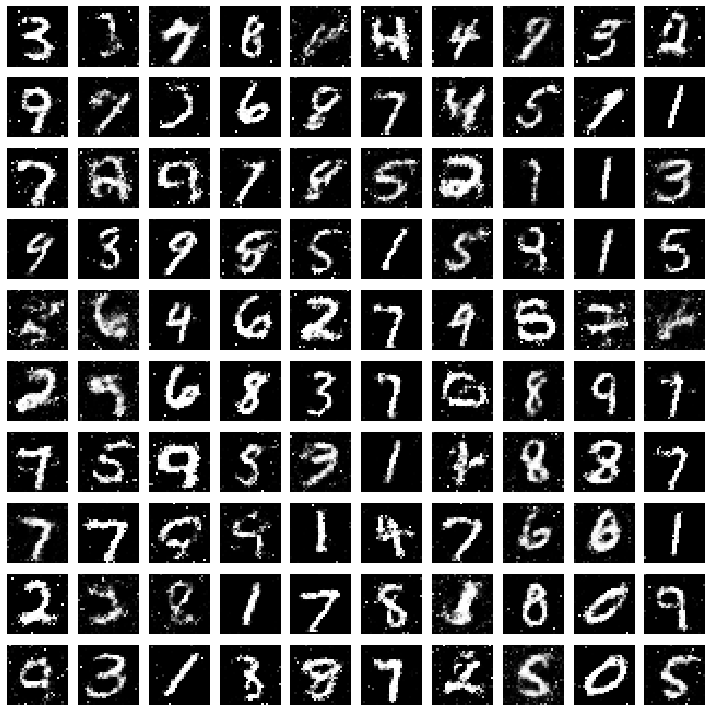

 Epoch No. 41 - > Discriminator Loss 0.6664 ::: Generator Loss 0.9656 
 Epoch No. 42 - > Discriminator Loss 0.6669 ::: Generator Loss 0.9621 
 Epoch No. 43 - > Discriminator Loss 0.6673 ::: Generator Loss 0.9690 
 Epoch No. 44 - > Discriminator Loss 0.6673 ::: Generator Loss 0.9639 
 Epoch No. 45 - > Discriminator Loss 0.6679 ::: Generator Loss 0.9622 


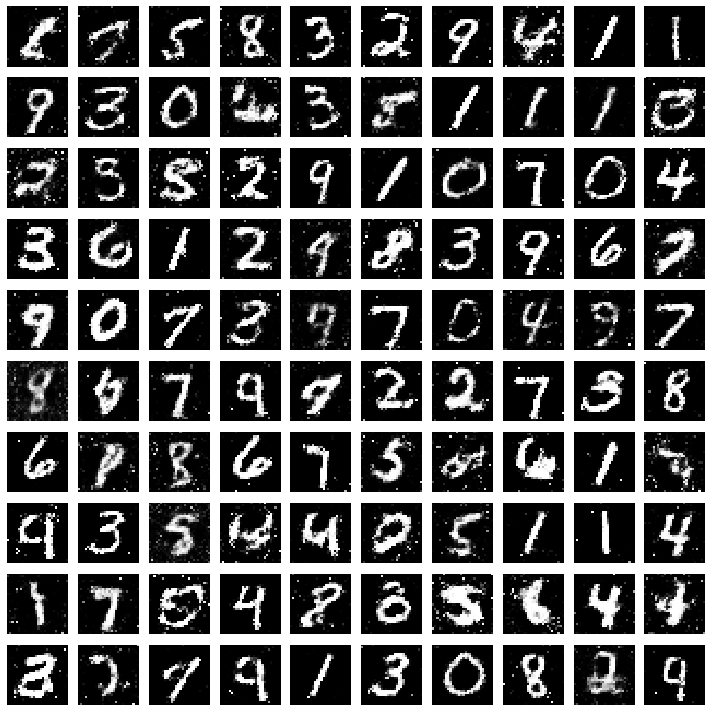

 Epoch No. 46 - > Discriminator Loss 0.6697 ::: Generator Loss 0.9602 
 Epoch No. 47 - > Discriminator Loss 0.6687 ::: Generator Loss 0.9555 
 Epoch No. 48 - > Discriminator Loss 0.6705 ::: Generator Loss 0.9614 
 Epoch No. 49 - > Discriminator Loss 0.6701 ::: Generator Loss 0.9559 
 Epoch No. 50 - > Discriminator Loss 0.6695 ::: Generator Loss 0.9560 


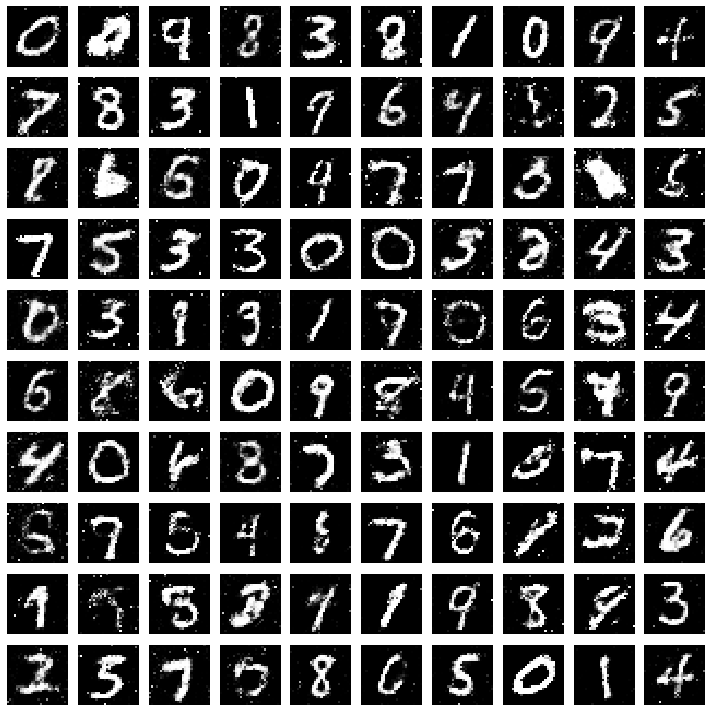

In [11]:
# Training GAN


for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    # Mini Batch GAN
    
    for step in range(NO_OF_BATCHES):
        
        # STEP - 1 TRAINING OF DISCRIMINATOR
        # FEEDING 50% FAKE + 50% REAL IMAGES 
        
        idx = np.random.randint(0,X_train.shape[0],HALF_BATCH)
        real_imgs = X_train[idx]
        
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM)) 
        fake_imgs = generator.predict(noise)  # forward pass or generator is non-trainable
        
        real_y = np.ones((HALF_BATCH,1))*0.9  # One sided label smoothing
        fake_y = np.zeros((HALF_BATCH,1)) 
        
        # Train discriminator 
        
        loss_real = discriminator.train_on_batch(real_imgs,real_y)
        loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*(loss_real) + 0.5*(loss_fake)
        epoch_d_loss += d_loss
        
        # STEP - 2 TRAINING GENERATOR
        # DISCRIMINATOR FROZEN
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        Ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,Ground_truth_y)
        epoch_g_loss += g_loss
        
        
    print(" Epoch No. %d - > Discriminator Loss %.4f ::: Generator Loss %.4f "%((epoch + 1) , epoch_d_loss / NO_OF_BATCHES , epoch_g_loss / NO_OF_BATCHES))
        
        
    if (epoch + 1) % 5==0:
        generator.save('model/gan_generator{0}.h5'.format((epoch + 1)))
        save_imgs(epoch)


In [12]:
!zip -r /content/images.zip /content/images 

  adding: content/images/ (stored 0%)
  adding: content/images/gan_generated_output45.png (deflated 6%)
  adding: content/images/gan_generated_output15.png (deflated 4%)
  adding: content/images/gan_generated_output50.png (deflated 6%)
  adding: content/images/gan_generated_output5.png (deflated 4%)
  adding: content/images/gan_generated_output10.png (deflated 4%)
  adding: content/images/gan_generated_output40.png (deflated 6%)
  adding: content/images/gan_generated_output25.png (deflated 6%)
  adding: content/images/gan_generated_output20.png (deflated 6%)
  adding: content/images/gan_generated_output30.png (deflated 6%)
  adding: content/images/gan_generated_output35.png (deflated 6%)


In [14]:
!zip -r /content/model.zip /content/model 

  adding: content/model/ (stored 0%)
  adding: content/model/gan_generator40.h5 (deflated 8%)
  adding: content/model/gan_generator25.h5 (deflated 8%)
  adding: content/model/gan_generator35.h5 (deflated 8%)
  adding: content/model/gan_generator10.h5 (deflated 8%)
  adding: content/model/gan_generator5.h5 (deflated 8%)
  adding: content/model/gan_generator45.h5 (deflated 8%)
  adding: content/model/gan_generator15.h5 (deflated 8%)
  adding: content/model/gan_generator50.h5 (deflated 8%)
  adding: content/model/gan_generator30.h5 (deflated 8%)
  adding: content/model/gan_generator20.h5 (deflated 8%)


In [13]:
from google.colab import files
files.download('images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>